In [ ]:
import pandas as pd
import numpy as np

# Setting the random seed for reproducibility
np.random.seed(42)

# Number of samples for each entity
n_students = 1000
n_universities = 50
n_employers = 50
n_programs = 150
n_interactions = 3000

# Generating data for Students
student_ids = range(1, n_students + 1)
names = ["Student_" + str(i) for i in student_ids]
ages = np.random.randint(15, 25, n_students)
emails = [f"student{i}@mail.com" for i in student_ids]
schools = ["School_" + str(np.random.randint(1, 21)) for _ in student_ids]
fields_of_interest = np.random.choice(['Engineering', 'Medicine', 'Arts', 'Business', 'Sciences'], n_students)

students_df = pd.DataFrame({
    'Student ID': student_ids,
    'Name': names,
    'Age': ages,
    'Email': emails,
    'School/College': schools,
    'Field of Interest': fields_of_interest
})

# Generating data for Universities
university_ids = range(1, n_universities + 1)
university_names = ["University_" + str(i) for i in university_ids]
university_locations = ["Location_" + str(np.random.randint(1, 21)) for _ in university_ids]
popular_courses = np.random.choice(['Computer Science', 'Medicine', 'Arts', 'Business Administration', 'Physics'], n_universities)

universities_df = pd.DataFrame({
    'University ID': university_ids,
    'Name': university_names,
    'Location': university_locations,
    'Popular Course': popular_courses
})

# Generating data for Employers
employer_ids = range(1, n_employers + 1)
employer_names = ["Employer_" + str(i) for i in employer_ids]
industries = np.random.choice(['Tech', 'Healthcare', 'Finance', 'Retail', 'Energy'], n_employers)
employer_locations = ["Location_" + str(np.random.randint(1, 21)) for _ in employer_ids]

employers_df = pd.DataFrame({
    'Employer ID': employer_ids,
    'Name': employer_names,
    'Industry': industries,
    'Location': employer_locations
})

# Generating data for Programs/Experiences
program_ids = range(1, n_programs + 1)
program_names = ["Program_" + str(i) for i in program_ids]
types = np.random.choice(['Work Experience', 'University Course Taster'], n_programs)
associated_ids = np.concatenate([np.random.choice(university_ids, n_programs // 2), np.random.choice(employer_ids, n_programs // 2)])
durations = np.random.randint(1, 6, n_programs)  # Duration in weeks
descriptions = ["Description for Program_" + str(i) for i in program_ids]

programs_df = pd.DataFrame({
    'Program ID': program_ids,
    'Name': program_names,
    'Type': types,
    'Associated Entity ID': associated_ids,
    'Duration (weeks)': durations,
    'Description': descriptions
})

# Generating data for Student Interactions
interaction_ids = range(1, n_interactions + 1)
interaction_student_ids = np.random.choice(student_ids, n_interactions)
interaction_program_ids = np.random.choice(program_ids, n_interactions)
dates = pd.date_range(start="2022-01-01", end="2023-01-01", freq='D').to_numpy()
interaction_dates = np.random.choice(dates, n_interactions)
ratings = np.random.randint(1, 6, n_interactions)

interactions_df = pd.DataFrame({
    'Interaction ID': interaction_ids,
    'Student ID': interaction_student_ids,
    'Program ID': interaction_program_ids,
    'Date of Interaction': interaction_dates,
    'Feedback/Rating': ratings
})


In [ ]:
students_df.to_csv('students.csv', index=False)

In [ ]:
universities_df.to_csv('universities.csv', index=False)
employers_df.to_csv('employers.csv', index=False)
programs_df.to_csv('programs.csv', index=False)
interactions_df.to_csv('interactions.csv', index=False)

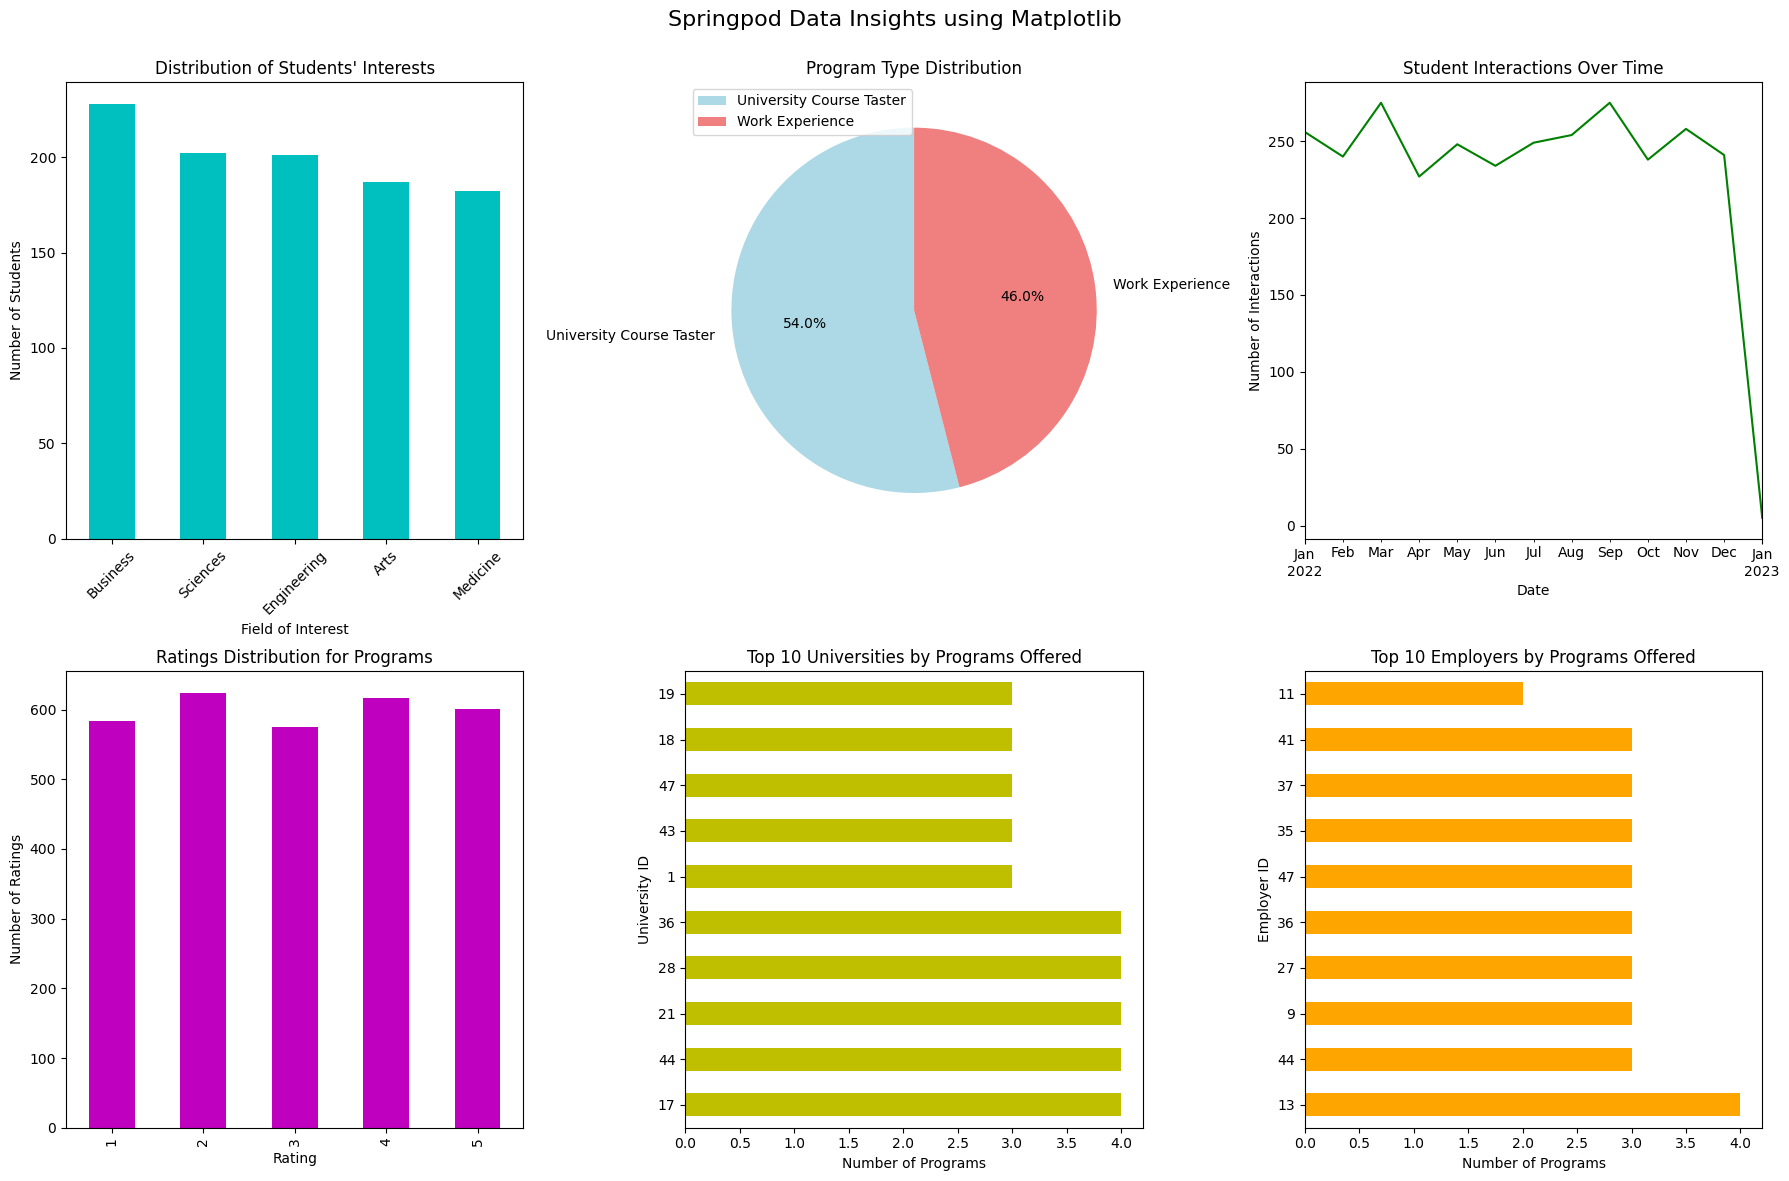

In [8]:

# Visualization 1: Distribution of Students' Interests
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Springpod Data Insights using Matplotlib', fontsize=16)

# Visualization 1: Distribution of Students' Interests
students_df['Field of Interest'].value_counts().plot(kind='bar', ax=ax[0, 0], color='c')
ax[0, 0].set_title('Distribution of Students\' Interests')
ax[0, 0].set_xlabel('Field of Interest')
ax[0, 0].set_ylabel('Number of Students')
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45)

# Visualization 2: Program Type Distribution
programs_df['Type'].value_counts().plot(kind='pie', ax=ax[0, 1], autopct='%1.1f%%', startangle=90, legend=True, colors=['lightblue', 'lightcoral'])
ax[0, 1].set_title('Program Type Distribution')
ax[0, 1].set_ylabel('')

# Visualization 3: Student Interactions Over Time
interactions_df.groupby(interactions_df['Date of Interaction'].dt.to_period("M")).size().plot(ax=ax[0, 2], color='g')
ax[0, 2].set_title('Student Interactions Over Time')
ax[0, 2].set_xlabel('Date')
ax[0, 2].set_ylabel('Number of Interactions')

# Visualization 4: Ratings Distribution for Programs
interactions_df['Feedback/Rating'].value_counts().sort_index().plot(kind='bar', ax=ax[1, 0], color='m')
ax[1, 0].set_title('Ratings Distribution for Programs')
ax[1, 0].set_xlabel('Rating')
ax[1, 0].set_ylabel('Number of Ratings')

# Visualization 5: Top 10 Universities by Programs Offered
top_universities = programs_df[programs_df['Type'] == 'University Course Taster']['Associated Entity ID'].value_counts().head(10)
top_universities.plot(kind='barh', ax=ax[1, 1], color='y')
ax[1, 1].set_title('Top 10 Universities by Programs Offered')
ax[1, 1].set_xlabel('Number of Programs')
ax[1, 1].set_ylabel('University ID')

# Visualization 6: Top 10 Employers by Programs Offered
top_employers = programs_df[programs_df['Type'] == 'Work Experience']['Associated Entity ID'].value_counts().head(10)
top_employers.plot(kind='barh', ax=ax[1, 2], color='orange')
ax[1, 2].set_title('Top 10 Employers by Programs Offered')
ax[1, 2].set_xlabel('Number of Programs')
ax[1, 2].set_ylabel('Employer ID')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

